In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
# read dir and search for WHITE, DARK and OBJECT (RAW and HDR)
def readDir(dir_path):
    myDir = os.listdir(dir_path)
    dark_hdr =[]
    dark_raw=[]
    white_hdr=[]
    white_raw=[]
    for file in myDir:
        if 'dark' in file.lower() and 'hdr' in file.lower():
            #dark_hdr = dir_path + '/' + file
            dark_hdr = os.path.join(dir_path, file)
        if 'dark' in file.lower() and 'raw' in file.lower():
            #dark_raw = dir_path + '/' + file
            dark_raw = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'hdr' in file.lower():
            #white_hdr = dir_path + '/' + file
            white_hdr = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'raw' in file.lower():
            #white_raw = dir_path + '/' + file
            white_raw = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'hdr' in file.lower():
            #object_hdr = dir_path + '/' + file
            object_hdr = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'raw' in file.lower():
            #object_raw = dir_path + '/' + file
            object_raw = os.path.join(dir_path, file)
    return object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr  


# Read HDR content
def read_hdr(hdr_path):
    f=open(hdr_path, "r")
    filelines = f.readlines()
    f.close()
    bands = ''
    for fileline in filelines:
        if 'samples' in fileline.lower():
            samples = int(fileline.replace('samples = ',''))
        if bands =='' and 'bands' in fileline.lower():
            bands = int(fileline.replace('bands = ',''))
        if 'lines' in fileline.lower():
            lines = int(fileline.replace('lines = ',''))   
    n = 0
    for fileline in filelines:
        if 'th = {' in fileline.lower():
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    waves = np.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        waves[n] = float(filelines[i].replace(',',''))
        n = n + 1
    

    return samples, bands, lines, waves     

## Task 1_part1


Colorchecker Scanner


./Colorchecker [scanner]/capture/page_scan_0022.raw
spectral_image.shape:  (1146, 135, 2144)


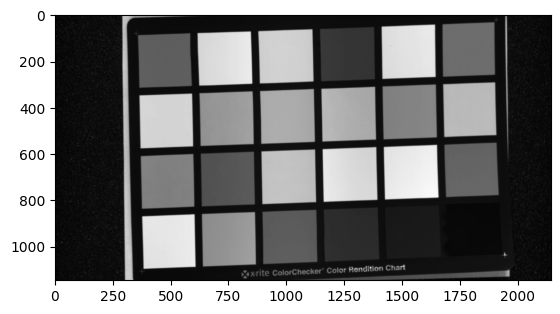

./Colorchecker [scanner]/capture/WHITEREF_page_scan_0022.hdr
59 135 2144


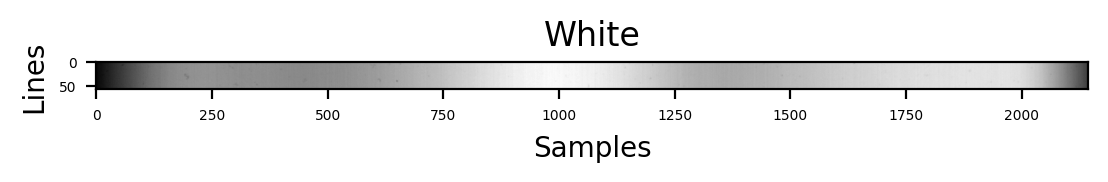

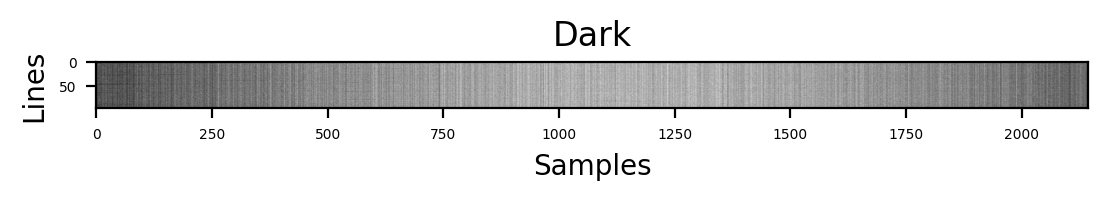

In [2]:
# Read main object 
path = "./Colorchecker [scanner]/capture/"

[object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)
print(object_raw)
[samples, bands, lines, waves_scanner] = read_hdr(object_hdr)

#open_path = object_raw
# Read raw ###############################################
fopen = open(object_raw, "rb")
raw_image = np.fromfile(fopen, dtype=np.uint16)  #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
spectral_image = np.reshape(raw_image, (lines, bands, samples))
print('spectral_image.shape: ', spectral_image.shape)
plt.rcParams['figure.dpi'] = 100 # Resolution
plt.imshow(spectral_image[:,100,:], cmap='gray') # show gray scale slice of 3D spectral image
plt.show()


# Read White ###############################################
print(white_hdr)
[samples, bands, lines, waves_scanner] = read_hdr(white_hdr)
print(lines, bands, samples)
open_path = white_raw
fopen = open(open_path, "rb")
raw_image = np.fromfile(fopen, dtype=np.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
white_image = np.reshape(raw_image, (lines, bands, samples))/lines
plt.rcParams['figure.dpi'] = 200
plt.imshow(white_image[:,50,:], cmap="gray")# , vmin=0, vmax=60500
plt.title("White")
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()

# Read Dark ###############################################
[samples, bands, lines, waves_scanner] = read_hdr(dark_hdr)
open_path = dark_raw
fopen = open(open_path, "rb")
raw_image = np.fromfile(fopen, dtype=np.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
dark_image = np.reshape(raw_image, (lines, bands, samples))/lines
plt.rcParams['figure.dpi'] = 200
plt.imshow(dark_image[:,20,:], cmap="gray")#, vmin=0, vmax=10
plt.title("Dark")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.show()




(1146, 135, 2144)


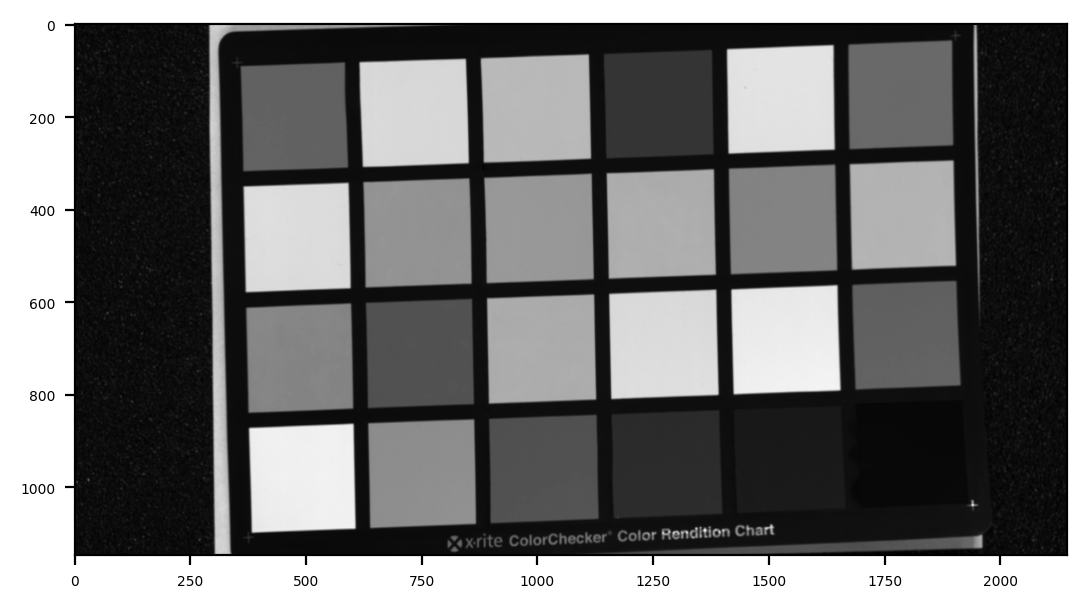

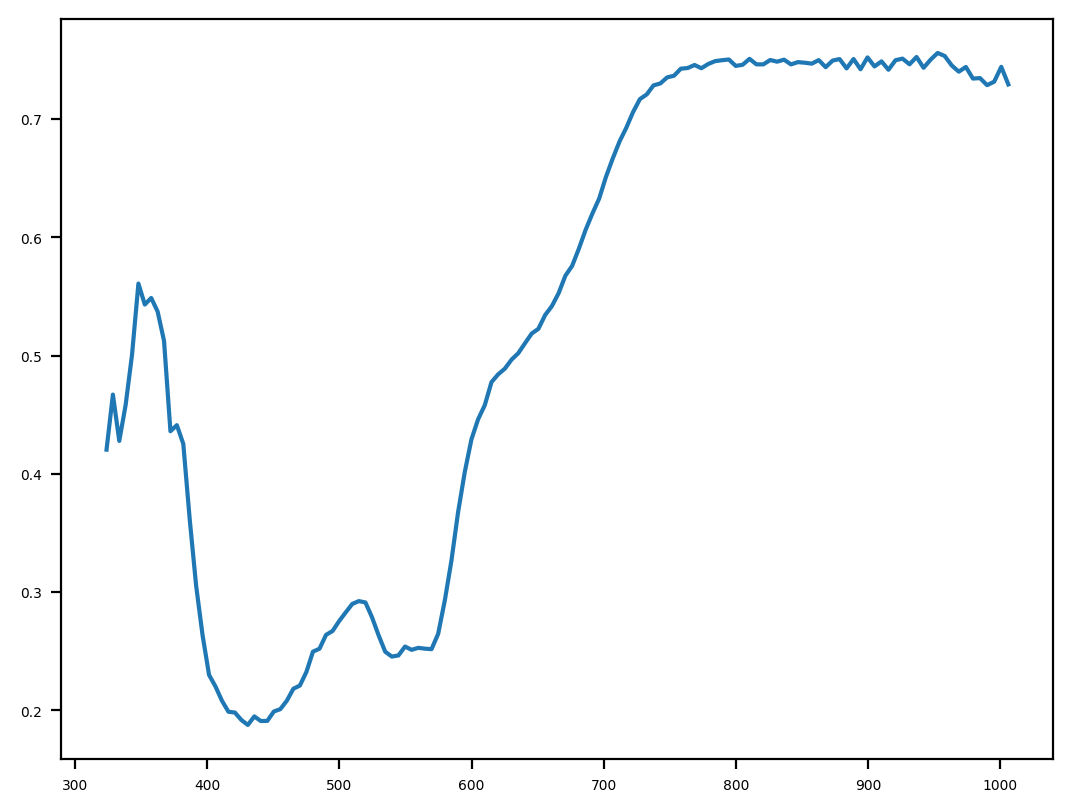

In [3]:
# Calculate average for Dark and White

# Spectral_cube = upper_part/lower_part
# upper_part = spectral_image-dark
# lower_part = white - dark
white_av = np.sum(white_image, axis = 0) # get average for White
dark_av = np.sum(dark_image, axis = 0) # get average for Dark

[lines, bands, samples] = spectral_image.shape
print(spectral_image.shape)
upper_part = np.zeros((lines, bands, samples), dtype=np.float32)
spectral_cube_1 = np.zeros((lines, bands, samples), dtype=np.float32)
# Subtract [image - dark]
for i in range(lines):
  upper_part[i,:,:] = np.subtract(spectral_image[i,:,:], dark_av) 
# Subtract [white - dark]
lower_part = np.subtract(white_av, dark_av) 
# Subtract [image devide [white-dark]]
for i in range(lines):
  spectral_cube_1[i,:,:] = np.divide(upper_part[i,:,:], lower_part)
# spectral_cube[:,:,:]  a white corrected spectral cube

plt.imshow(5*spectral_cube_1[:,100,:], cmap="gray")#, vmin=0, vmax= 1

plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.plot(waves_scanner, spectral_cube_1[200,:,750])#

plt.tick_params(axis='both', which='major', labelsize=5)

plt.rcParams['figure.dpi'] = 250
plt.show()

# spectral_cube.tofile()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


wavelength 630.31
wavelength 539.71
wavelength 445.52


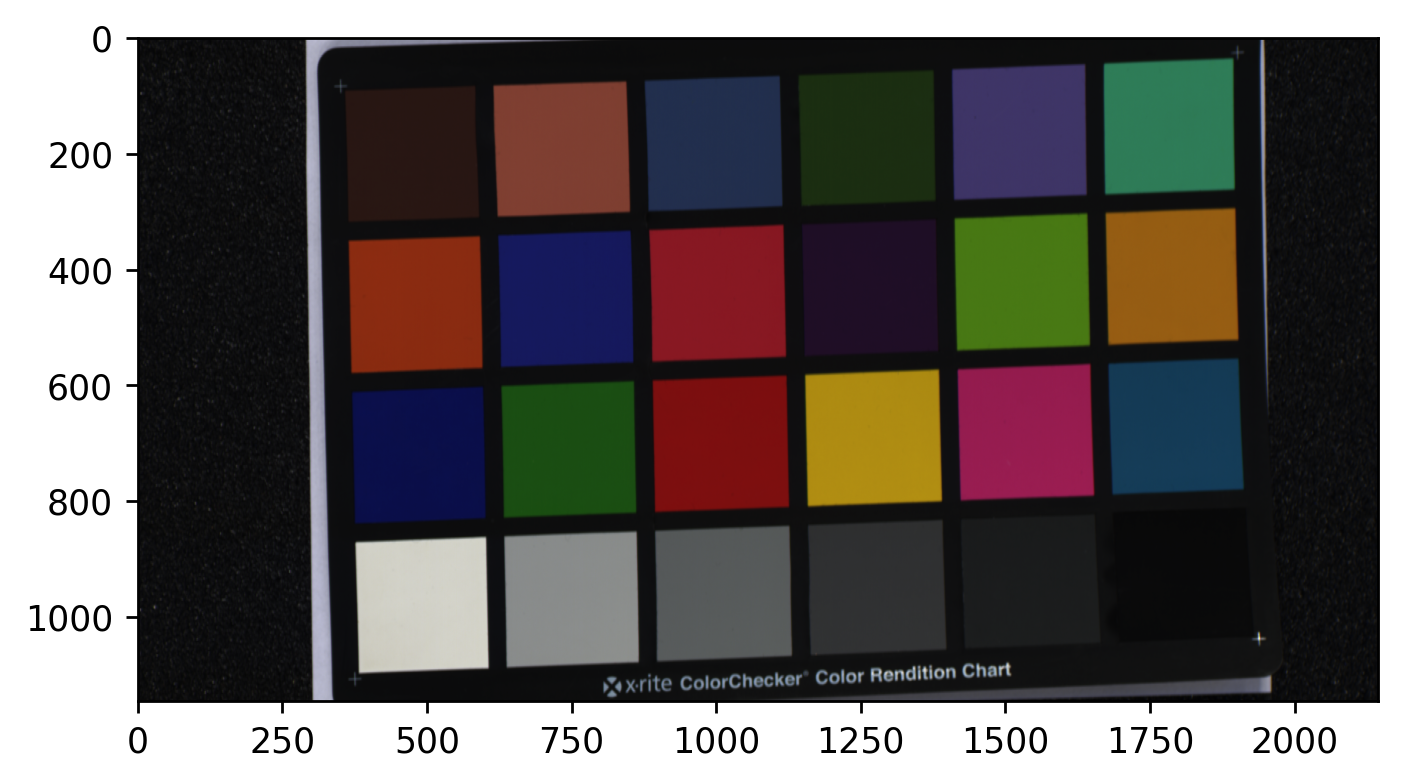

In [4]:
[s1,s2,s3] = spectral_cube_1.shape
RGBw1 = np.empty((s1, s3, 3)) # Create a 'bmp' array with spatial size of ENVI 512,512 with 3 layers
# We go to hdr file and select channels

w1,w2,w3 = 630,540,445
ch_1 = np.abs(np.asarray(waves_scanner)-w1).argmin() 
ch_2 = np.abs(np.asarray(waves_scanner)-w2).argmin()
ch_3 = np.abs(np.asarray(waves_scanner)-w3).argmin()

print('wavelength', waves_scanner[ch_1])
print('wavelength', waves_scanner[ch_2])
print('wavelength', waves_scanner[ch_3])

RGBw1[:,:,0] = spectral_cube_1[:,ch_1,:]  
RGBw1[:,:,1] = spectral_cube_1[:,ch_2,:]
RGBw1[:,:,2] = spectral_cube_1[:,ch_3,:]




plt.imshow(RGBw1)
plt.show()

## Task1_part2

Color Checker 2 lamps [Specim IQ] + White Sample 2 lamps [Specim IQ]

./Colorchecker 2 lamps [Specim IQ]/capture/391.raw
spectral_image.shape:  (512, 204, 512)


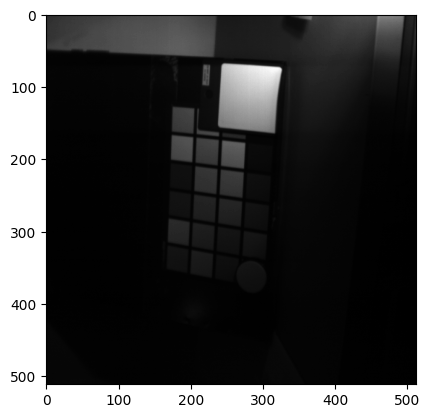

In [5]:
# Read main object 
path = "./Colorchecker 2 lamps [Specim IQ]/capture/"

[object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)
print(object_raw)
[samples, bands, lines, waves] = read_hdr(object_hdr)

#open_path = object_raw
# Read raw ###############################################
fopen = open(object_raw, "rb")
raw_image = np.fromfile(fopen, dtype=np.uint16)  #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
raw_spectral_image = np.reshape(raw_image, (lines, bands, samples))
print('spectral_image.shape: ', raw_spectral_image.shape)
plt.rcParams['figure.dpi'] = 100 # Resolution
plt.imshow(raw_spectral_image[:,150,:], cmap='gray') # show gray scale slice of 3D spectral image
plt.show()


./White sample 2 lamps  [Specim IQ]/capture/392.raw
white_spectral_image.shape:  (512, 204, 512)


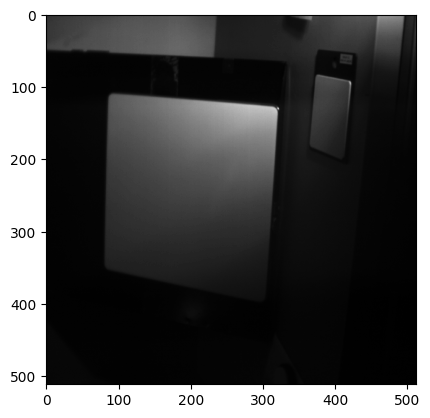

wavelength 619.3
wavelength 545.62
wavelength 449.35


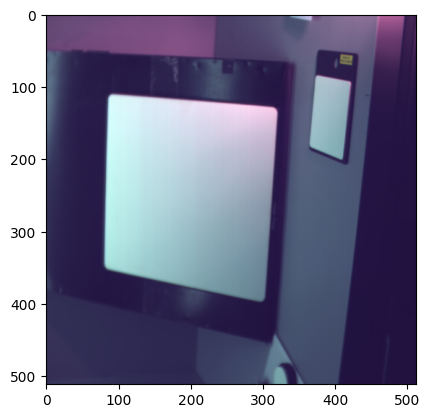

In [6]:
path = "./White sample 2 lamps  [Specim IQ]/capture/"

[object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)
print(object_raw)
[samples, bands, lines, waves] = read_hdr(object_hdr)

#open_path = object_raw
# Read raw ###############################################
fopen = open(object_raw, "rb")
raw_image = np.fromfile(fopen, dtype=np.uint16)  #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
white_spectral_image = np.reshape(raw_image, (lines, bands, samples))
print('white_spectral_image.shape: ', white_spectral_image.shape)
plt.rcParams['figure.dpi'] = 100 # Resolution
plt.imshow(white_spectral_image[:,150,:], cmap='gray') # show gray scale slice of 3D spectral image
plt.show()

RGB_w = np.empty((lines, samples, 3)) 

w1,w2,w3 = 620,545,448
ch_1 = np.abs(np.asarray(waves)-w1).argmin() 
ch_2 = np.abs(np.asarray(waves)-w2).argmin()
ch_3 = np.abs(np.asarray(waves)-w3).argmin()

print('wavelength', waves[ch_1])
print('wavelength', waves[ch_2])
print('wavelength', waves[ch_3])

RGB_w[:,:,0] = white_spectral_image[:,ch_1,:] /np.amax(white_spectral_image[:,ch_1,:]) # we get RGB in range [0,1], normalized
RGB_w[:,:,1] = white_spectral_image[:,ch_2,:] /np.amax(white_spectral_image[:,ch_2,:])
RGB_w[:,:,2] = white_spectral_image[:,ch_3,:] /np.amax(white_spectral_image[:,ch_3,:])
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGB_w)
plt.show()



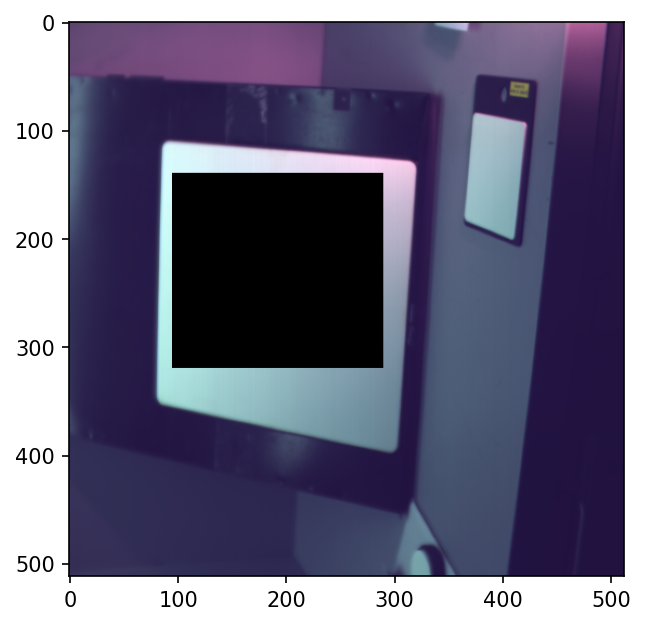

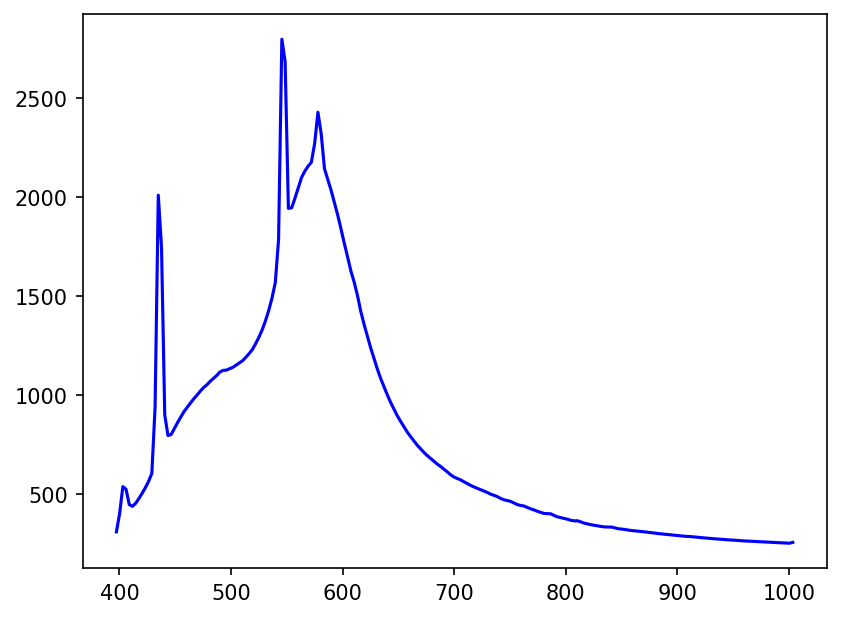

In [7]:
x1 = 95
x2 = 290
y1 = 140
y2 = 320
RGB_w[y1:y2,x1:x2,0] = 0
RGB_w[y1:y2,x1:x2,1] = 0
RGB_w[y1:y2,x1:x2,2] = 0
sel = white_spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
white_p = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
plt.rcParams['figure.dpi'] = 150
plt.imshow(RGB_w)
plt.show()


plt.plot(waves, white_p, "b")

plt.show()


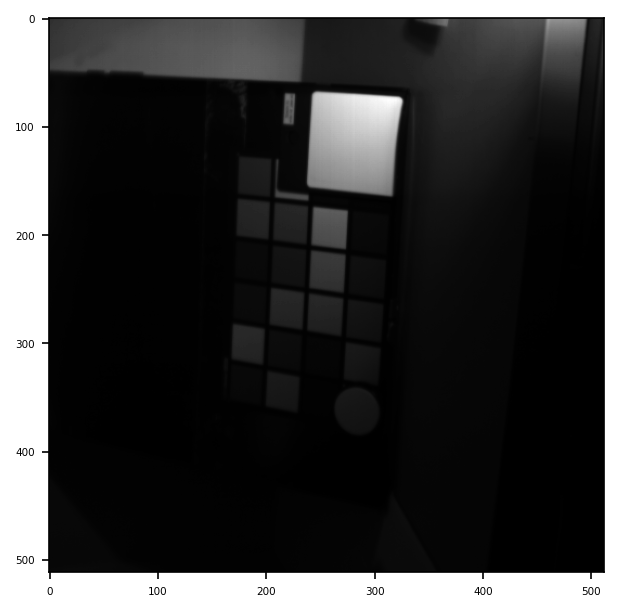

In [8]:


corr_spectral_cube = np.transpose(raw_spectral_image, (0, 2, 1)) 
corr_spectral_cube = corr_spectral_cube/ white_p


plt.imshow(corr_spectral_cube[:,:,100], cmap="gray")

plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


wavelength 631.15
wavelength 530.96
wavelength 443.56


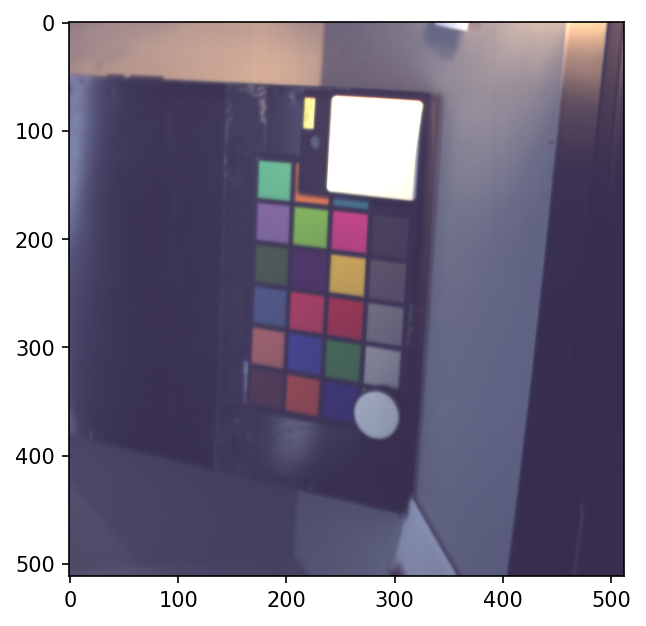

In [9]:
[s1,s2,s3] = corr_spectral_cube.shape
RGBw2 = np.empty((s1, s2, 3)) # Create a 'bmp' array with spatial size of ENVI 512,512 with 3 layers
# We go to hdr file and select channels

w1,w2,w3 = 630,530,445
ch_1 = np.abs(np.asarray(waves)-w1).argmin() 
ch_2 = np.abs(np.asarray(waves)-w2).argmin()
ch_3 = np.abs(np.asarray(waves)-w3).argmin()

print('wavelength', waves[ch_1])
print('wavelength', waves[ch_2])
print('wavelength', waves[ch_3])

RGBw2[:,:,0] = corr_spectral_cube[:,:,ch_1] 
RGBw2[:,:,1] = corr_spectral_cube[:,:,ch_2] 
RGBw2[:,:,2] = corr_spectral_cube[:,:,ch_3] 
plt.rcParams['figure.dpi'] = 150

plt.imshow(RGBw2)



## Task1_part3

wavelength 631.15
wavelength 539.75
wavelength 455.16


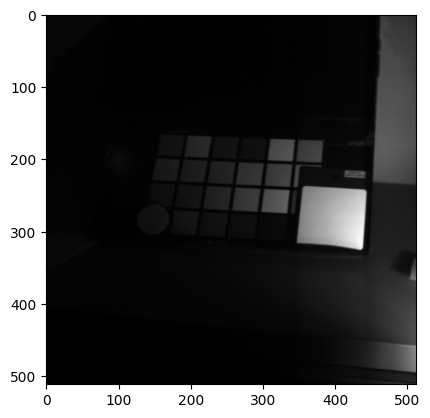

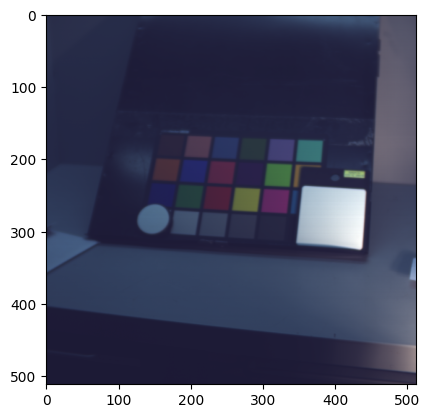

(512, 204, 512)
(512, 512, 3)


In [10]:
RGB_raw = np.empty((lines, samples, 3)) 
w1,w2,w3 = 630,540,455
ch_1 = np.abs(np.asarray(waves)-w1).argmin() 
ch_2 = np.abs(np.asarray(waves)-w2).argmin()
ch_3 = np.abs(np.asarray(waves)-w3).argmin()

print('wavelength', waves[ch_1])
print('wavelength', waves[ch_2])
print('wavelength', waves[ch_3])

RGB_raw[:,:,0] = raw_spectral_image[:,ch_1,:] /np.amax(raw_spectral_image[:,ch_1,:]) # we get RGB in range [0,1], normalized
RGB_raw[:,:,1] = raw_spectral_image[:,ch_2,:] /np.amax(raw_spectral_image[:,ch_2,:])
RGB_raw[:,:,2] = raw_spectral_image[:,ch_3,:] /np.amax(raw_spectral_image[:,ch_3,:])

# RGB_raw is without white correction

spectral_cube = np.rot90(raw_spectral_image, k=1, axes=(2, 0))
RGB = np.rot90(RGB_raw, k=1, axes=(1, 0))

plt.rcParams['figure.dpi'] = 100 # Resolution
plt.imshow(spectral_cube[:,150,:], cmap='gray') # show gray scale slice of 3D spectral image
plt.show()

plt.rcParams['figure.dpi'] = 100
plt.imshow(RGB)
plt.show()
print(spectral_cube.shape)
print(RGB.shape)


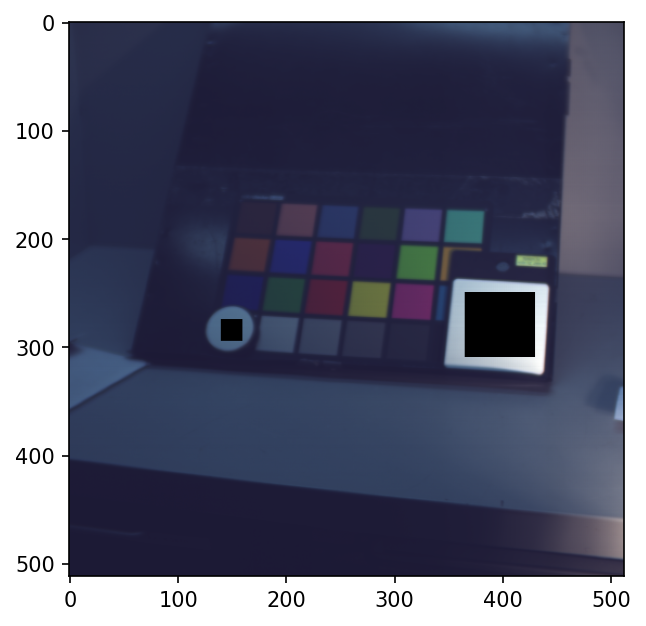

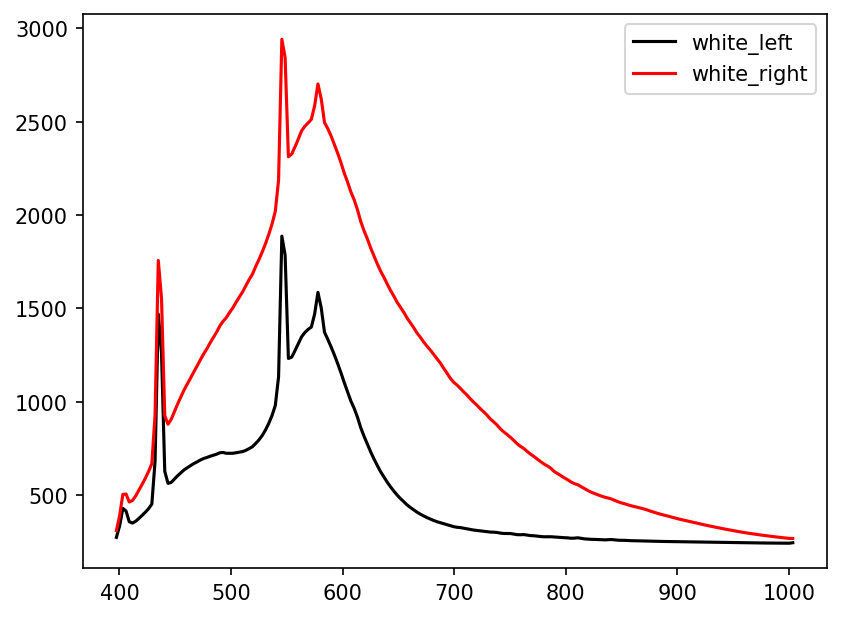

(512, 204, 512)


In [11]:
RGBw3 = RGB.copy()


# Select White_L

x1 = 140
x2 = 160
y1 = 275
y2 = 295
RGBw3[y1:y2,x1:x2,0] = 0
RGBw3[y1:y2,x1:x2,1] = 0
RGBw3[y1:y2,x1:x2,2] = 0
sel = spectral_cube[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
white_L = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))

# Select White_R
x1 = 365
x2 = 430
y1 = 250
y2 = 310
RGBw3[y1:y2,x1:x2,0] = 0
RGBw3[y1:y2,x1:x2,1] = 0
RGBw3[y1:y2,x1:x2,2] = 0
sel = spectral_cube[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
white_R = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))




plt.rcParams['figure.dpi'] = 150
plt.imshow(RGBw3)
plt.show()


plt.plot(waves, white_L, "black")
plt.plot(waves, white_R, "red")


plt.legend(["white_left","white_right"])

plt.show()
print(spectral_cube.shape)
###############################################

wavelength 619.3
wavelength 545.62
wavelength 449.35


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


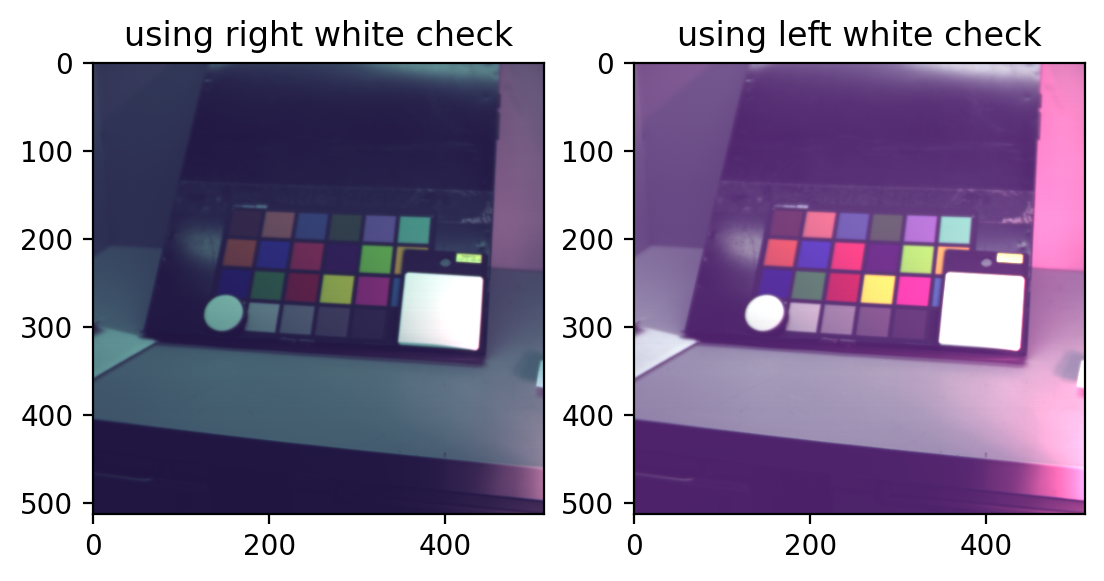

In [12]:

spectral_cube_left = spectral_cube/white_L[:,np.newaxis]


RGB_left = np.empty((lines, samples, 3)) 

w1,w2,w3 = 620,545,448
ch_1 = np.abs(np.asarray(waves)-w1).argmin() 
ch_2 = np.abs(np.asarray(waves)-w2).argmin()
ch_3 = np.abs(np.asarray(waves)-w3).argmin()

print('wavelength', waves[ch_1])
print('wavelength', waves[ch_2])
print('wavelength', waves[ch_3])

RGB_left[:,:,0] = spectral_cube_left[:,ch_1,:] 
RGB_left[:,:,1] = spectral_cube_left[:,ch_2,:] 
RGB_left[:,:,2] = spectral_cube_left[:,ch_3,:] 

spectral_cube_right = spectral_cube/white_R[:,np.newaxis]

RGB_right = np.empty((lines, samples, 3)) 

w1,w2,w3 = 620,545,448
ch_1 = np.abs(np.asarray(waves)-w1).argmin() 
ch_2 = np.abs(np.asarray(waves)-w2).argmin()
ch_3 = np.abs(np.asarray(waves)-w3).argmin()


RGB_right[:,:,0] = spectral_cube_right[:,ch_1,:] 
RGB_right[:,:,1] = spectral_cube_right[:,ch_2,:] 
RGB_right[:,:,2] = spectral_cube_right[:,ch_3,:] 








plt.rcParams['figure.dpi'] = 200
plt.subplot(1,2,1).set_title("using right white check")
plt.imshow(RGB_right)
plt.subplot(1,2,2).set_title("using left white check")
plt.imshow(RGB_left)
plt.show()




## Task 1_part_4,5,6


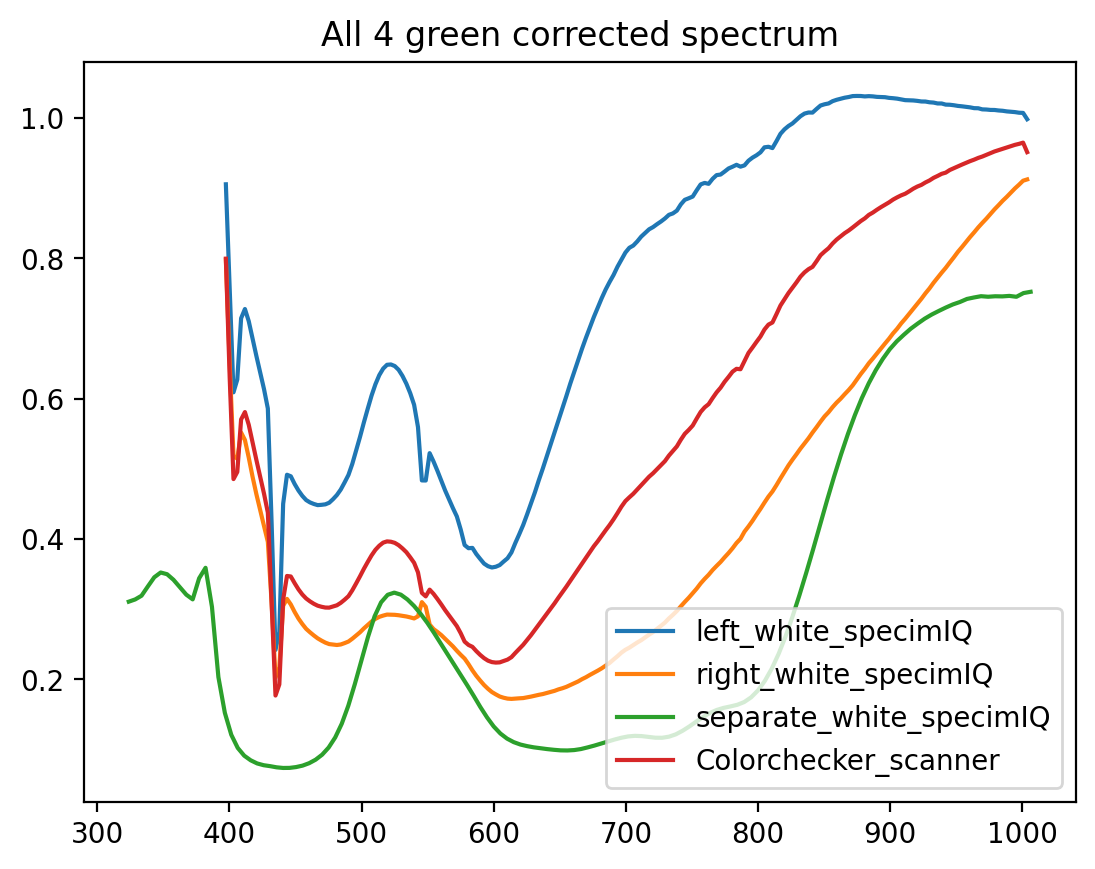

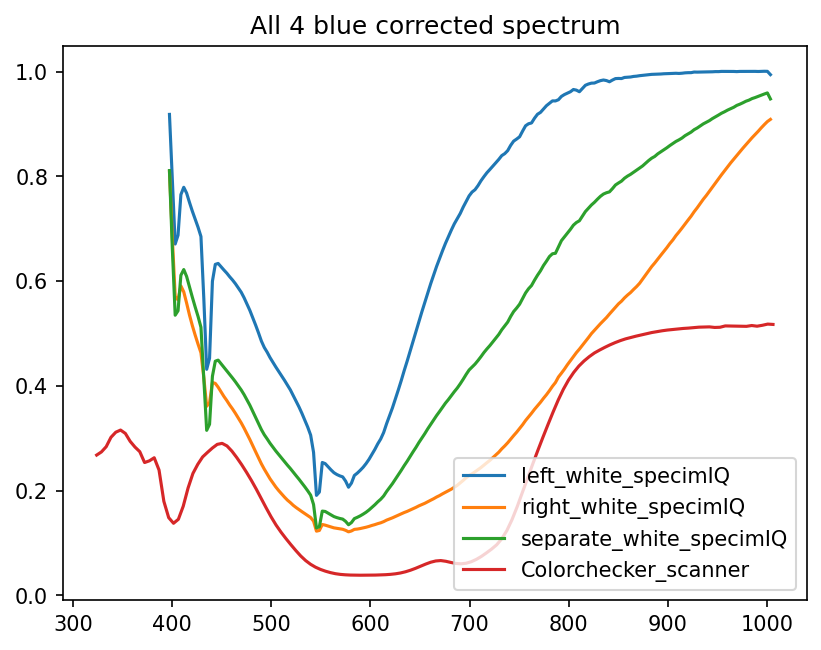

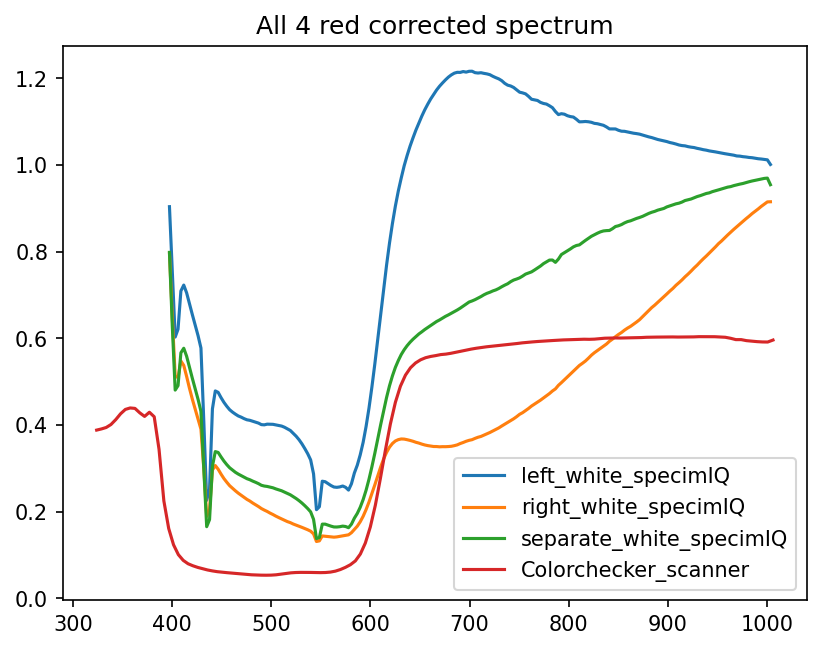

In [13]:

#### For colorchecker scanner


# Select Red

RGBw1_p4 = RGBw1.copy()
x1 = 950
x2 = 1050
y1 = 680
y2 = 780
RGBw1_p4[y1:y2,x1:x2,0] = 0
RGBw1_p4[y1:y2,x1:x2,1] = 0
RGBw1_p4[y1:y2,x1:x2,2] = 0
sel = spectral_cube_1[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
red_scanner = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select Blue
x1 = 450
x2 = 550
y1 = 680
y2 = 780
RGBw1_p4[y1:y2,x1:x2,0] = 0
RGBw1_p4[y1:y2,x1:x2,1] = 0
RGBw1_p4[y1:y2,x1:x2,2] = 0
sel = spectral_cube_1[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
blue_scanner = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select Green
x1 = 700
x2 = 800
y1 = 680
y2 = 780
RGBw1_p4[y1:y2,x1:x2,0] = 0
RGBw1_p4[y1:y2,x1:x2,1] = 0
RGBw1_p4[y1:y2,x1:x2,2] = 0
sel = spectral_cube_1[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
green_scanner = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))













#### For colorchecker SpecimIQ


# Select Red

corr_spectral_cube_orgsize = np.transpose(corr_spectral_cube, (0, 2, 1))

RGBw2_p4 = RGBw2.copy()
x1 = 250
x2 = 260
y1 = 270
y2 = 280
RGBw2_p4[y1:y2,x1:x2,0] = 0
RGBw2_p4[y1:y2,x1:x2,1] = 0
RGBw2_p4[y1:y2,x1:x2,2] = 0
sel = corr_spectral_cube_orgsize[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
red_spec = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select Blue
x1 = 245
x2 = 255
y1 = 345
y2 = 355
RGBw2_p4[y1:y2,x1:x2,0] = 0
RGBw2_p4[y1:y2,x1:x2,1] = 0
RGBw2_p4[y1:y2,x1:x2,2] = 0
sel = corr_spectral_cube_orgsize[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
blue_spec = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select Green
x1 = 250
x2 = 260
y1 = 310
y2 = 320
RGBw2_p4[y1:y2,x1:x2,0] = 0
RGBw2_p4[y1:y2,x1:x2,1] = 0
RGBw2_p4[y1:y2,x1:x2,2] = 0
sel = corr_spectral_cube_orgsize[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
green_spec = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))













####### For left and right white correction case

# For left

# Select Red
RGB_left_p4 = RGB_left.copy()

x1 = 225
x2 = 250
y1 = 245
y2 = 260

RGB_left_p4[y1:y2,x1:x2,0] = 0
RGB_left_p4[y1:y2,x1:x2,1] = 0
RGB_left_p4[y1:y2,x1:x2,2] = 0
sel = spectral_cube_left[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
red_L = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select Blue
x1 = 150
x2 = 170
y1 = 240
y2 = 255
RGB_left_p4[y1:y2,x1:x2,0] = 0
RGB_left_p4[y1:y2,x1:x2,1] = 0
RGB_left_p4[y1:y2,x1:x2,2] = 0
sel = spectral_cube_left[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
blue_L = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select Green
x1 = 190
x2 = 210
y1 = 245
y2 = 260
RGB_left_p4[y1:y2,x1:x2,0] = 0
RGB_left_p4[y1:y2,x1:x2,1] = 0
RGB_left_p4[y1:y2,x1:x2,2] = 0
sel = spectral_cube_left[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
green_L = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))




RGB_right_p4 = RGB_right.copy()


# For right

# select Red
x1 = 225
x2 = 250
y1 = 245
y2 = 260
RGB_right_p4[y1:y2,x1:x2,0] = 0
RGB_right_p4[y1:y2,x1:x2,1] = 0
RGB_right_p4[y1:y2,x1:x2,2] = 0
sel = spectral_cube_right[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
red_R = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select Blue
x1 = 150
x2 = 170
y1 = 240
y2 = 255
RGB_right_p4[y1:y2,x1:x2,0] = 0
RGB_right_p4[y1:y2,x1:x2,1] = 0
RGB_right_p4[y1:y2,x1:x2,2] = 0
sel = spectral_cube_right[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
blue_R = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select Green
x1 = 190
x2 = 210
y1 = 245
y2 = 260
RGB_right_p4[y1:y2,x1:x2,0] = 0
RGB_right_p4[y1:y2,x1:x2,1] = 0
RGB_right_p4[y1:y2,x1:x2,2] = 0
sel = spectral_cube_right[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
green_R = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))










# Plotting spectrums


# Green
plt.plot(waves, green_L)
plt.plot(waves, green_R)
plt.plot(waves_scanner, green_scanner)
plt.plot(waves, green_spec)
plt.legend(["left_white_specimIQ","right_white_specimIQ","separate_white_specimIQ","Colorchecker_scanner"], loc =4)
plt.title("All 4 green corrected spectrum")
plt.rcParams['figure.dpi'] = 150

plt.show()

# Blue
plt.plot(waves, blue_L)
plt.plot(waves, blue_R)
plt.plot(waves, blue_spec)
plt.plot(waves_scanner, blue_scanner)
plt.legend(["left_white_specimIQ","right_white_specimIQ","separate_white_specimIQ","Colorchecker_scanner"],loc =4)
plt.title("All 4 blue corrected spectrum")
plt.rcParams['figure.dpi'] = 150
plt.show()

#Red
plt.plot(waves, red_L)
plt.plot(waves, red_R)
plt.plot(waves, red_spec)
plt.plot(waves_scanner, red_scanner)
plt.legend(["left_white_specimIQ","right_white_specimIQ","separate_white_specimIQ","Colorchecker_scanner"], loc =4)
plt.title("All 4 red corrected spectrum")
plt.rcParams['figure.dpi'] = 150
plt.show()



## Task 2

1040 1392 33
(1040, 33, 1392)


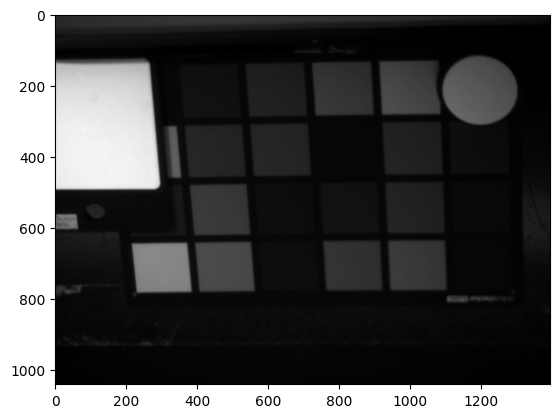

In [14]:


dirpath = "./Colorchecker 2 lamps [Nuance]"
myDir = os.listdir(dirpath)
# Read the first image define it size, define the total number of Images and get the size of future ENVI Spectral Cube
fullpath = os.path.join(dirpath, myDir[0])
im = Image.open(fullpath)
single_slice = np.array(im) # make a numpy array
[x, y] = single_slice.shape 
spectral = len(myDir)
print(x, y, spectral)



# save as integers, data type = 12
spectral_cube = np.ndarray(shape=(x,spectral,y), dtype=np.uint16)
print(spectral_cube.shape)


i=0
for file in myDir:
  fullpath = os.path.join(dirpath, file)
  im = Image.open(fullpath) 
  single_slice = np.array(im)
  #print(imarray.shape)
  spectral_cube[:,i,:]=single_slice
  i = i + 1

waves_n=np.linspace(400,720,33)

spectral_cube.tofile('nuance.raw')
# Save ready ENVI cube made of tiffs
plt.rcParams['figure.dpi'] = 100
plt.imshow(spectral_cube[:,10,:], cmap='gray') #, vmin=0, vmax=3138

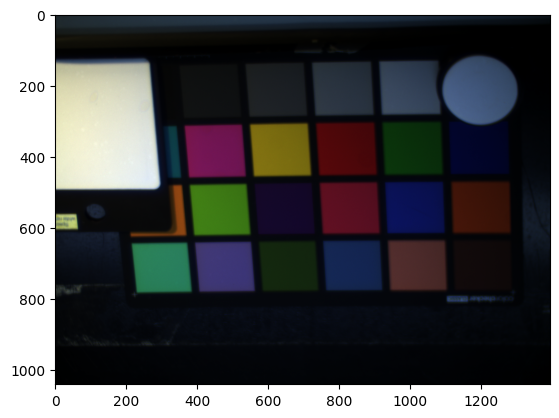

In [15]:
lines,bands,samples = spectral_cube.shape
RGB = np.empty((lines, samples, 3)) 

ch1 = 23
ch2 = 13
ch3 = 4


RGB[:,:,0] = spectral_cube[:,ch1,:] /np.amax(spectral_cube[:,ch1,:]) 
RGB[:,:,1] = spectral_cube[:,ch2,:] /np.amax(spectral_cube[:,ch2,:])
RGB[:,:,2] = spectral_cube[:,ch3,:] /np.amax(spectral_cube[:,ch3,:])

plt.rcParams['figure.dpi'] = 100
plt.imshow(RGB)
plt.show()

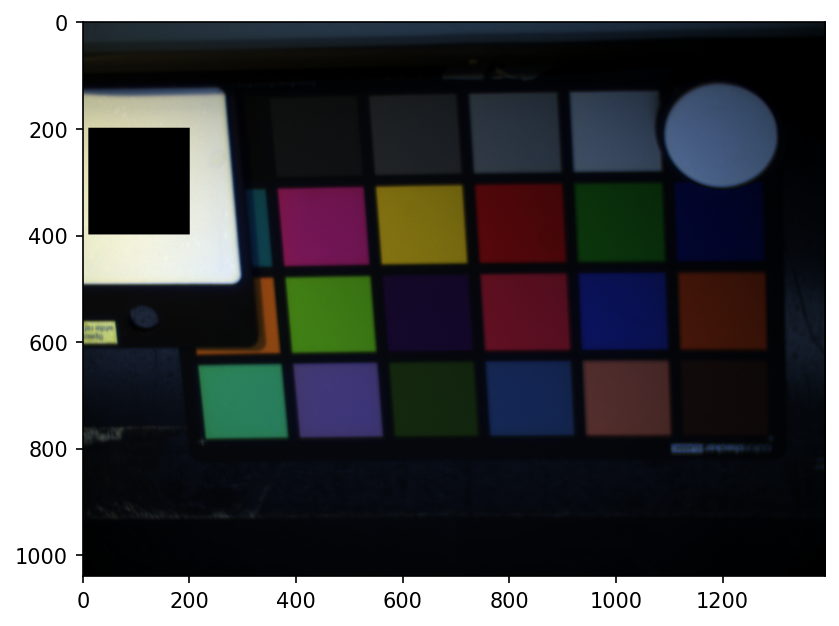

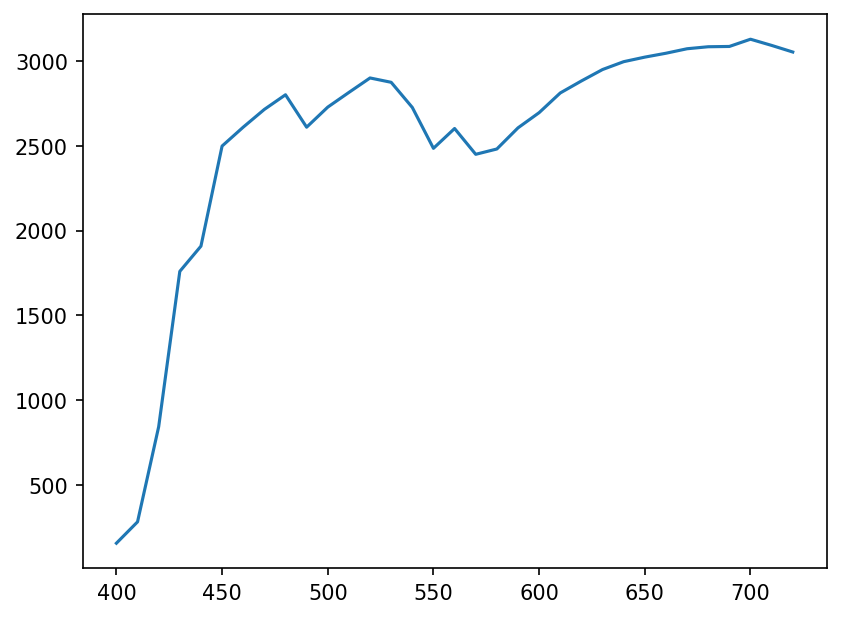

In [16]:
x1 = 10
x2 = 200
y1 = 200
y2 = 400
RGB[y1:y2,x1:x2,0] = 0
RGB[y1:y2,x1:x2,1] = 0
RGB[y1:y2,x1:x2,2] = 0
sel = spectral_cube[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
white = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))


plt.rcParams['figure.dpi'] = 150
plt.imshow(RGB)
plt.show()

plt.plot(waves_n, white)



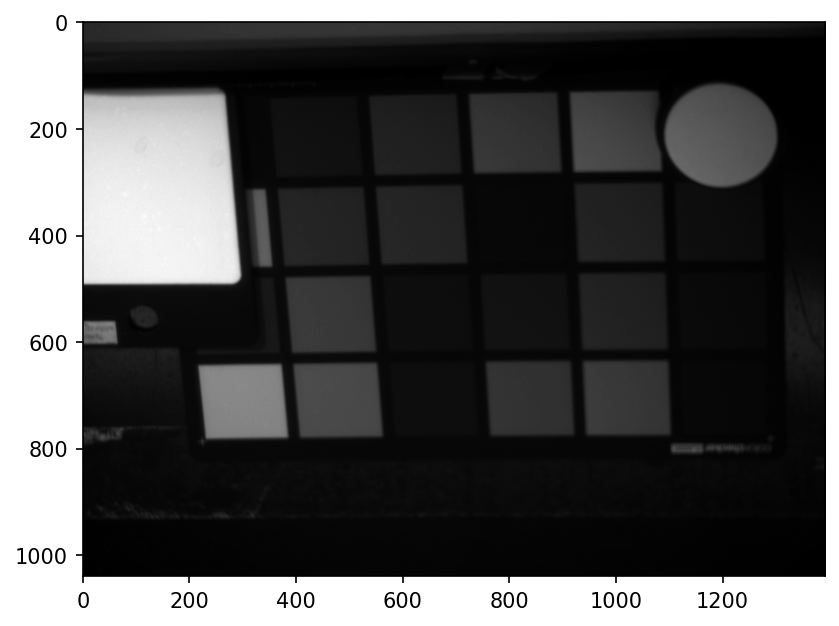

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


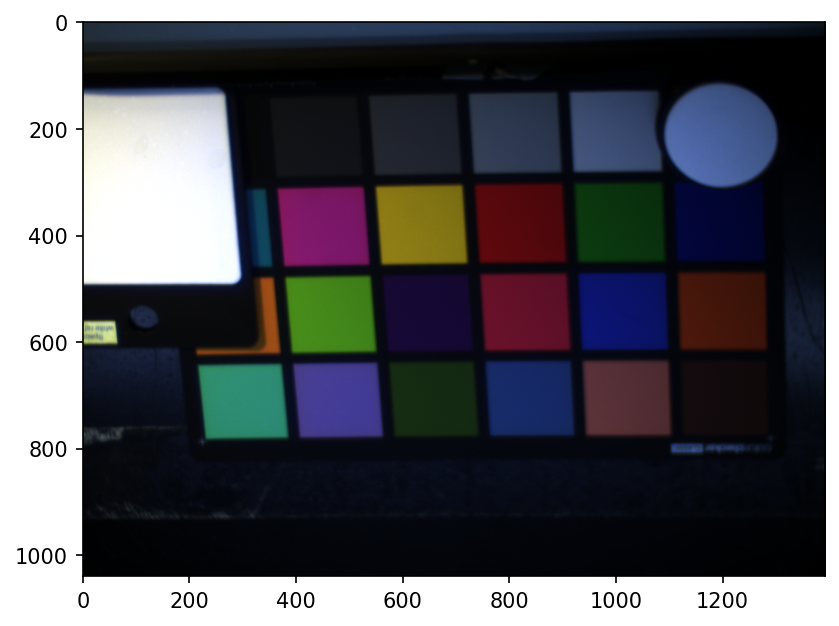

In [17]:
spectral_cube_n = spectral_cube/white[:,np.newaxis]


RGB_corr = np.empty((lines, samples, 3)) 


RGB_corr[:,:,0] = spectral_cube_n[:,ch1,:] 
RGB_corr[:,:,1] = spectral_cube_n[:,ch2,:] 
RGB_corr[:,:,2] = spectral_cube_n[:,ch3,:] 

plt.rcParams['figure.dpi'] = 150

plt.imshow(spectral_cube_n[:,10,:], cmap = 'gray')

plt.show()
plt.imshow(RGB_corr)

plt.show()




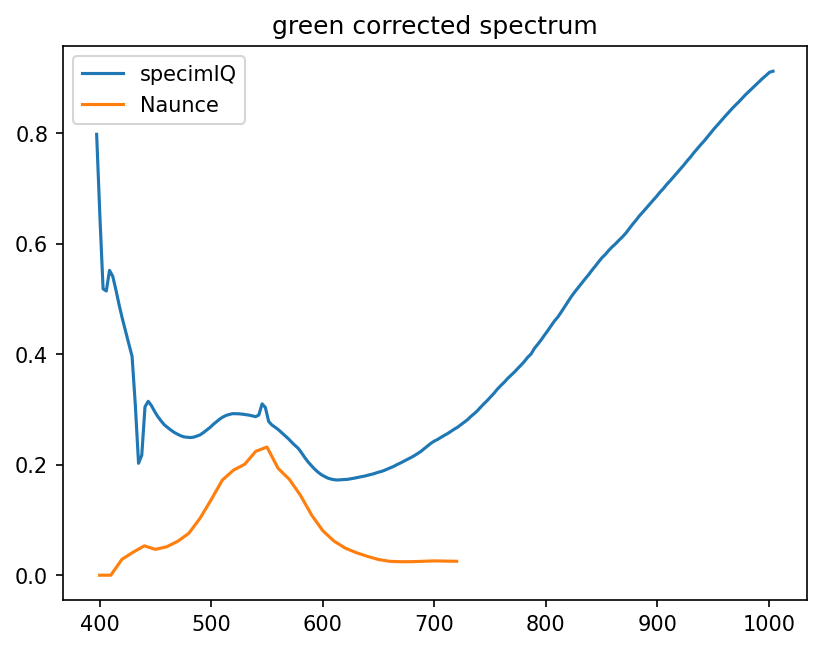

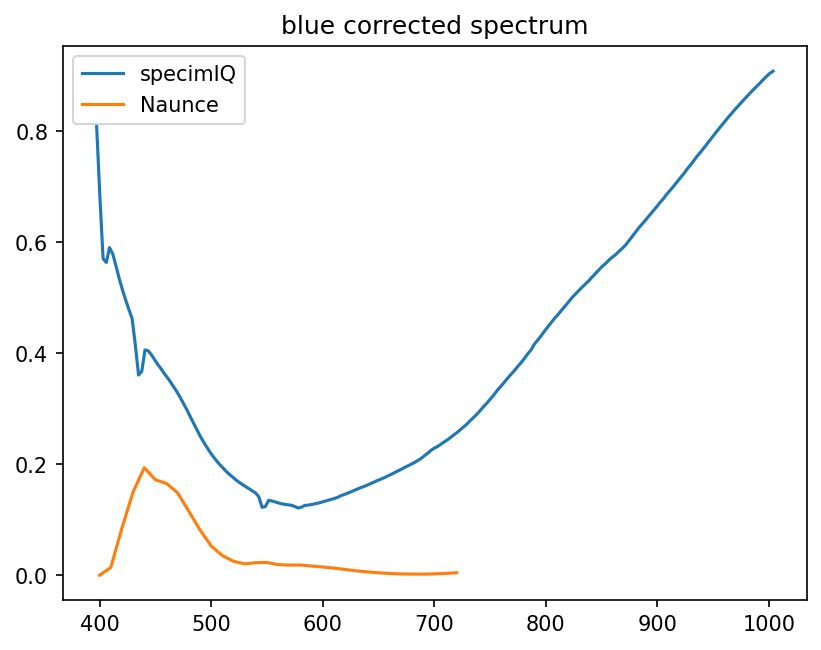

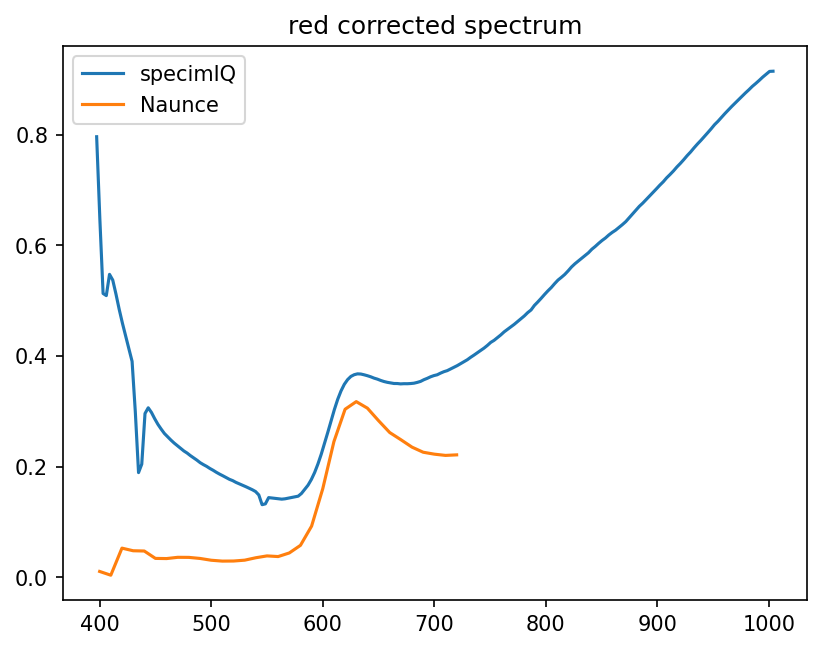

In [18]:



RGB_right_tk2 = RGB_right.copy()



# select Red
x1 = 225
x2 = 250
y1 = 245
y2 = 260
RGB_right_tk2[y1:y2,x1:x2,0] = 0
RGB_right_tk2[y1:y2,x1:x2,1] = 0
RGB_right_tk2[y1:y2,x1:x2,2] = 0
sel = spectral_cube_right[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
red_s = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select Blue
x1 = 150
x2 = 170
y1 = 240
y2 = 255
RGB_right_tk2[y1:y2,x1:x2,0] = 0
RGB_right_tk2[y1:y2,x1:x2,1] = 0
RGB_right_tk2[y1:y2,x1:x2,2] = 0
sel = spectral_cube_right[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
blue_s = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select Green
x1 = 190
x2 = 210
y1 = 245
y2 = 260
RGB_right_tk2[y1:y2,x1:x2,0] = 0
RGB_right_tk2[y1:y2,x1:x2,1] = 0
RGB_right_tk2[y1:y2,x1:x2,2] = 0
sel = spectral_cube_right[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
green_s = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))





###### Naunce

RGB_n = RGB_corr.copy()



# select blue
x1 = 1150
x2 = 1250
y1 = 330
y2 = 400
RGB_n[y1:y2,x1:x2,0] = 0
RGB_n[y1:y2,x1:x2,1] = 0
RGB_n[y1:y2,x1:x2,2] = 0
sel = spectral_cube_n[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
blue_n = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select red
x1 = 800
x2 = 880
y1 = 330
y2 = 400
RGB_n[y1:y2,x1:x2,0] = 0
RGB_n[y1:y2,x1:x2,1] = 0
RGB_n[y1:y2,x1:x2,2] = 0
sel = spectral_cube_n[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
red_n = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select Green
x1 = 980
x2 = 1050
y1 = 330
y2 = 400
RGB_n[y1:y2,x1:x2,0] = 0
RGB_n[y1:y2,x1:x2,1] = 0
RGB_n[y1:y2,x1:x2,2] = 0
sel = spectral_cube_n[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
green_n = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))



# Plotting spectrums


# Green
plt.plot(waves, green_s)
plt.plot(waves_n, green_n)

plt.legend(["specimIQ","Naunce"])
plt.title("green corrected spectrum")
plt.rcParams['figure.dpi'] = 150

plt.show()

# Blue
plt.plot(waves, blue_s)
plt.plot(waves_n, blue_n)

plt.legend(["specimIQ","Naunce"])
plt.title("blue corrected spectrum")
plt.rcParams['figure.dpi'] = 150
plt.show()

#Red
plt.plot(waves, red_s)
plt.plot(waves_n, red_n)

plt.legend(["specimIQ","Naunce"])
plt.title("red corrected spectrum")
plt.rcParams['figure.dpi'] = 150
plt.show()






